# YOLO v11

In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

In [2]:
model = YOLO("yolo11n.pt")

Successfully extracted and saved frame 500 to representative_frame.jpg
Displaying your selected frame:


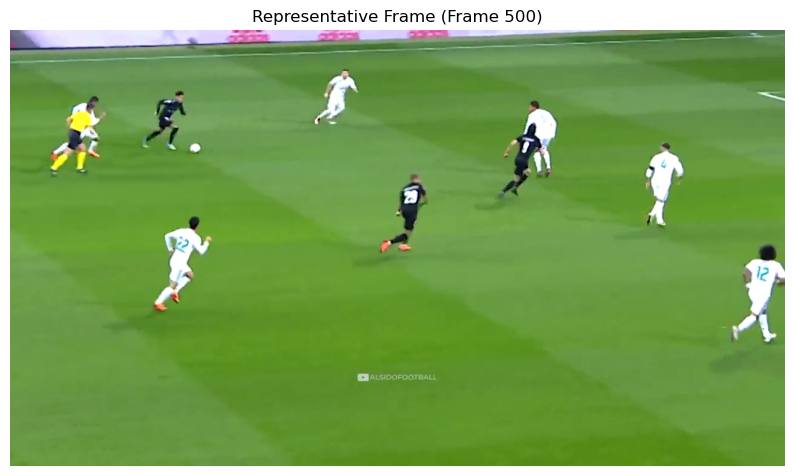

In [5]:
import cv2
import matplotlib.pyplot as plt

# get one specific frame from test video
video_path = "test_video.mp4"
output_image_path = "representative_frame.jpg"
frame_number_to_extract = 500  

# Load the video 
cap = cv2.VideoCapture(video_path)

# Set the video to the specific frame
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number_to_extract)

# Read the frame
ret, frame = cap.read()
    
# Save the frame as a new image file 
cv2.imwrite(output_image_path, frame)
print(f"Successfully extracted and saved frame {frame_number_to_extract} to {output_image_path}")

# Display the frame you just saved
print("Displaying your selected frame:")

# Convert from BGR (cv2's format) to RGB (matplotlib's format) (SOURCED FROM https://www.geeksforgeeks.org/python/convert-bgr-and-rgb-with-python-opencv/)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
plt.figure(figsize=(10, 6))
plt.imshow(frame_rgb)
plt.title(f"Representative Frame (Frame {frame_number_to_extract})")
plt.axis('off')
plt.show()

# Release the video capture object
cap.release()


image 1/1 /workspaces/eng-ai-agents/assignments/assignment-3/representative_frame.jpg: 384x640 9 persons, 1 sports ball, 35.8ms
Speed: 2.2ms preprocess, 35.8ms inference, 18.9ms postprocess per image at shape (1, 3, 384, 640)


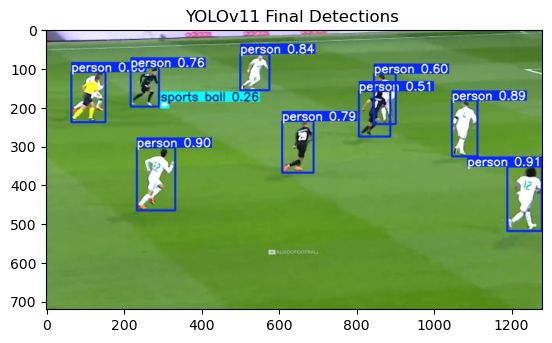

In [7]:
results = model.predict("representative_frame.jpg", classes=[0, 32])
res = results[0]

# Get the annotated image as a NumPy array
annotated_frame = res.plot()

# Display the image
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.title("YOLOv11 Final Detections ")
plt.show()


image 1/1 /workspaces/eng-ai-agents/assignments/assignment-3/representative_frame.jpg: 384x640 128 persons, 2 sports balls, 59.3ms
Speed: 1.9ms preprocess, 59.3ms inference, 159.7ms postprocess per image at shape (1, 3, 384, 640)


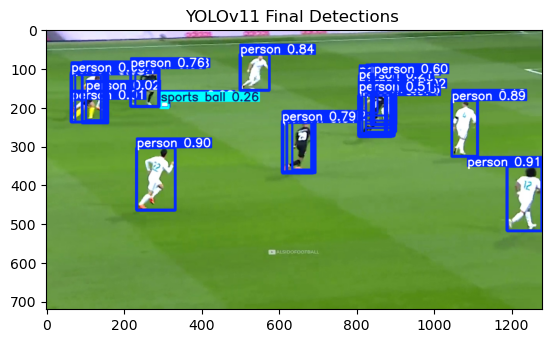

In [8]:
# Set conf low and iou high to see all raw boxes
raw_results = model.predict("representative_frame.jpg", classes=[0, 32], conf=0.01, iou=1.0)

res = raw_results[0]
# Get the annotated image as a NumPy array
annotated_frame = res.plot()

# Display the image
plt.imshow(cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB))
plt.title("YOLOv11 Final Detections ")
plt.show()

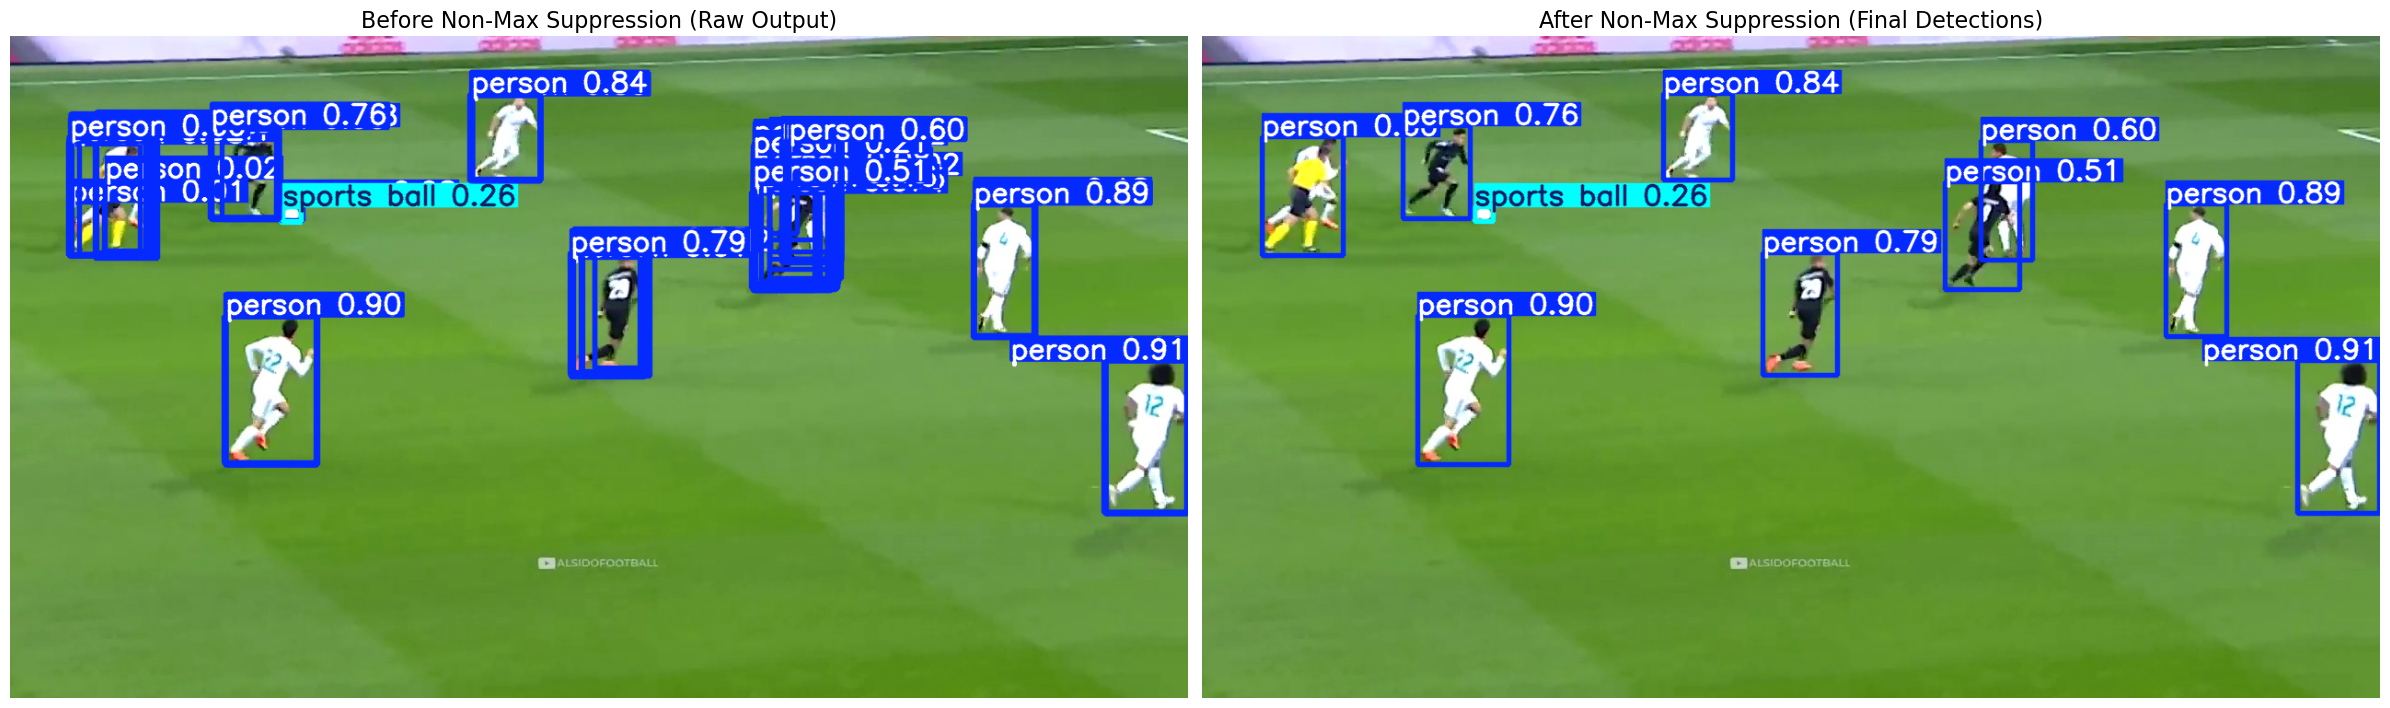

In [ ]:
img_final_bgr = results[0].plot()
img_raw_bgr = raw_results[0].plot()

img_final_rgb = cv2.cvtColor(img_final_bgr, cv2.COLOR_BGR2RGB)
img_raw_rgb = cv2.cvtColor(img_raw_bgr, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots(1, 2, figsize=(24, 12))

ax[0].imshow(img_raw_rgb)
ax[0].set_title("Before Non-Max Suppression (Raw Output)", fontsize=16)
ax[0].axis('off')

ax[1].imshow(img_final_rgb)
ax[1].set_title("After Non-Max Suppression (Final Detections)", fontsize=16)
ax[1].axis('off')

plt.tight_layout()
plt.show()

In [18]:
# This will save feature maps and other visuals to a 'runs/detect/predict' folder
model.predict(
    "representative_frame.jpg", 
    classes=[0, 32], 
    visualize=True,
    project="/workspaces/eng-ai-agents/assignments/assignment-3/runs/detect", 
    name="predict"
)


Saving /workspaces/eng-ai-agents/assignments/assignment-3/runs/detect/predict2/representative_frame/stage0_Conv_features.png... (16/16)
Saving /workspaces/eng-ai-agents/assignments/assignment-3/runs/detect/predict2/representative_frame/stage1_Conv_features.png... (32/32)
Saving /workspaces/eng-ai-agents/assignments/assignment-3/runs/detect/predict2/representative_frame/stage2_C3k2_features.png... (32/64)
Saving /workspaces/eng-ai-agents/assignments/assignment-3/runs/detect/predict2/representative_frame/stage3_Conv_features.png... (32/64)
Saving /workspaces/eng-ai-agents/assignments/assignment-3/runs/detect/predict2/representative_frame/stage4_C3k2_features.png... (32/128)
Saving /workspaces/eng-ai-agents/assignments/assignment-3/runs/detect/predict2/representative_frame/stage5_Conv_features.png... (32/128)
Saving /workspaces/eng-ai-agents/assignments/assignment-3/runs/detect/predict2/representative_frame/stage6_C3k2_features.png... (32/128)
Saving /workspaces/eng-ai-agents/assignments

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

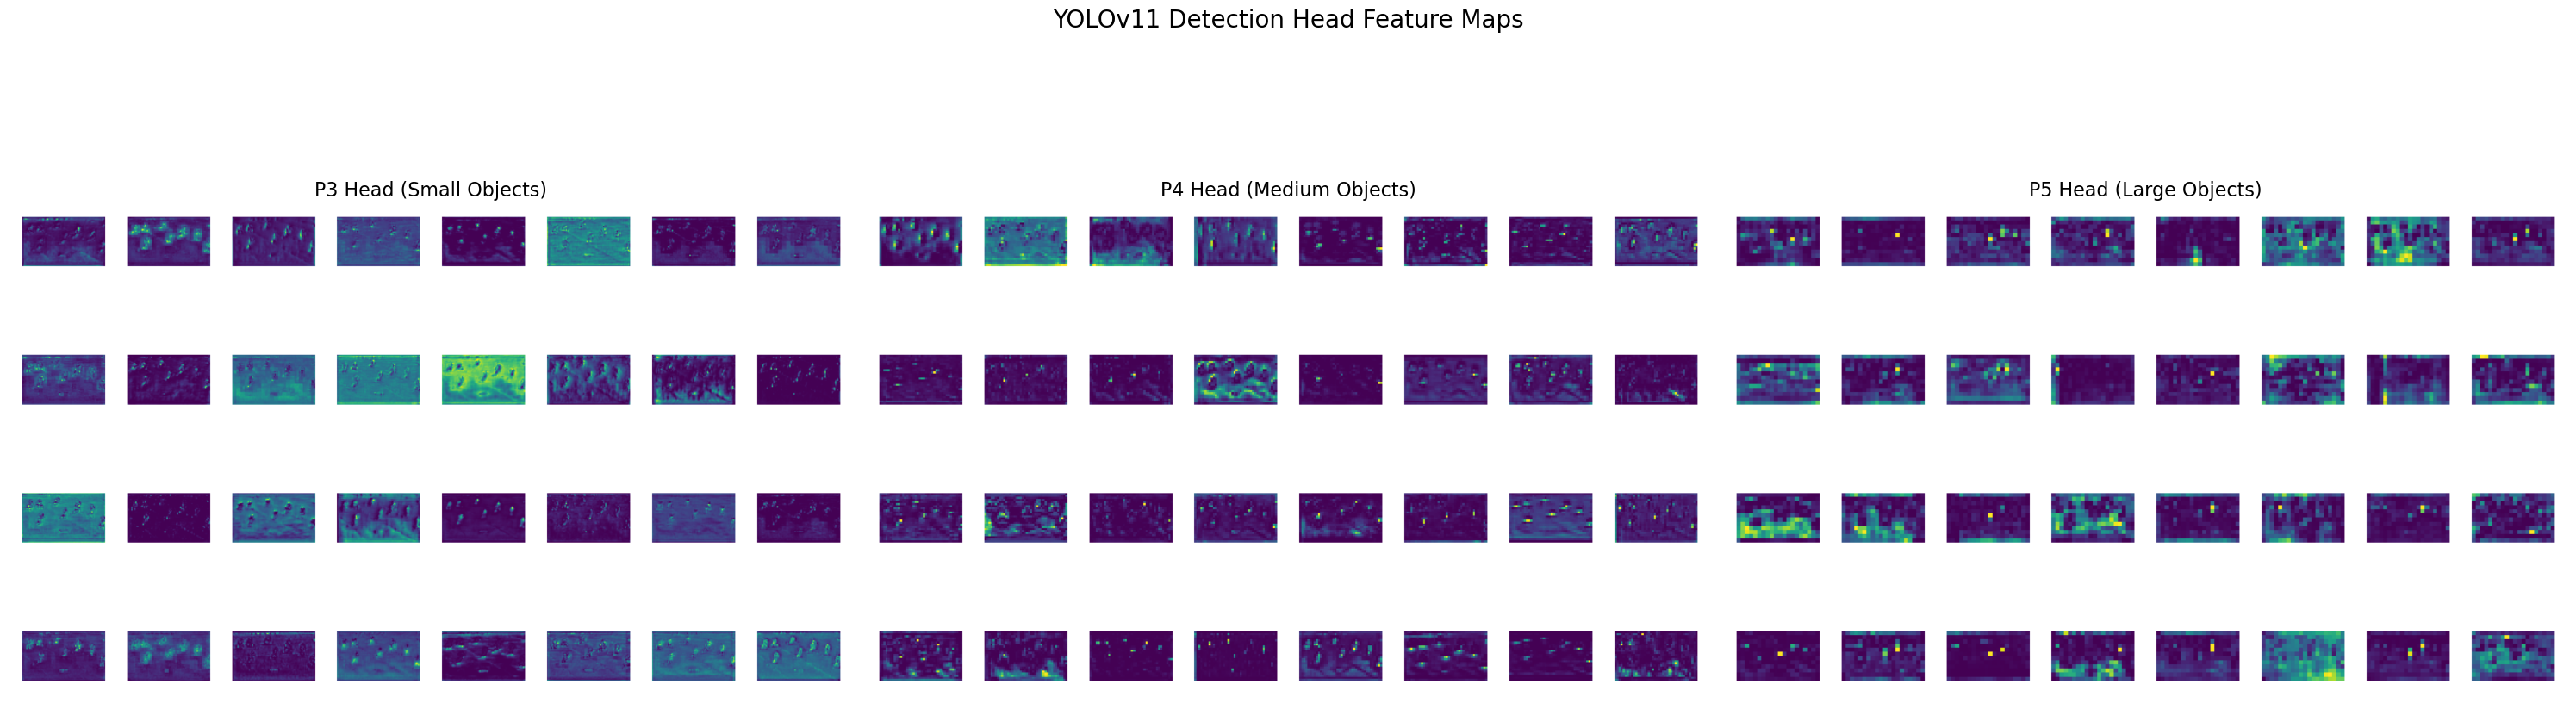

In [19]:
import glob

# The base path where all the images were saved
base_path = "/workspaces/eng-ai-agents/assignments/assignment-3/runs/detect/predict/representative_frame"

# --- Define the filenames for the detection heads ---
# We found these names in your output log
p3_file = "stage16_C3k2_features.png"
p4_file = "stage19_C3k2_features.png"
p5_file = "stage22_C3k2_features.png"

# --- Create the full file paths ---
p3_path = os.path.join(base_path, p3_file)
p4_path = os.path.join(base_path, p4_file)
p5_path = os.path.join(base_path, p5_file)

# --- Plot the feature maps ---
fig, ax = plt.subplots(1, 3, figsize=(30, 10))
fig.suptitle("YOLOv11 Detection Head Feature Maps", fontsize=20)

def plot_saved_map(axis, png_path, title):
    """Helper function to load and plot a saved PNG feature map."""
    if os.path.exists(png_path):
        # Open the image file
        img = Image.open(png_path)
        
        # Plot
        axis.imshow(img)
        axis.set_title(title, fontsize=16)
    else:
        # Show a fallback message if the file isn't found
        axis.text(0.5, 0.5, f"File not found:\n{png_path}", 
                  horizontalalignment='center', verticalalignment='center', 
                  transform=axis.transAxes, color='red')
        axis.set_title(title, fontsize=16)
        
    axis.axis('off')

# Plot all three maps
plot_saved_map(ax[0], p3_path, "P3 Head (Small Objects)")
plot_saved_map(ax[1], p4_path, "P4 Head (Medium Objects)")
plot_saved_map(ax[2], p5_path, "P5 Head (Large Objects)")

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout for suptitle
plt.show()

In [41]:
import os
output_project_path = "/workspaces/eng-ai-agents/assignments/assignment-3/runs/detect"
output_run_name = "final_annotated_video"
video_path = "/workspaces/eng-ai-agents/assignments/assignment-3/test_video.mp4"

model = YOLO("yolo11n.pt")

results = model.predict(
    source=video_path,
    conf=0.3,
    classes=[0, 32],
    save=True,                # Save annotated output video
    stream=False,             # Ensures it processes as a full video
    show=False,               # Don’t open GUI windows
    project=output_project_path,
    name=output_run_name,
    verbose=False             # Avoids debug/feature map dumps
)

# saved_video_path = os.path.join(output_project_path, output_run_name, "test_video.mp4")

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Results saved to /workspaces/eng-ai-agents/assignments/assignment-3/runs/detect/final_annotated_video


Summary: Briefly state what you did.

    Example: "In this project, a pre-trained YOLOv11n model was used to perform object detection on a soccer video. The model's pipeline was analyzed by visualizing raw outputs vs. NMS-processed outputs and inspecting the P3, P4, and P5 detection-head feature maps."

Analysis: Critically analyze the final video you just watched.

    What did it do well? (e.g., "The model was highly effective at detecting players, even in crowded groups.")

    What did it struggle with? (e.g., "The model frequently lost the 'sports ball', especially during fast motion or when the ball was occluded by a player's foot. Detection was also less reliable for players far away from the camera.")

Next Steps (Bridge to Kalman Filters): This is the most important part, as it connects to the theme of your assignment.

    Explain that YOLO provides detections but not tracking. The bounding boxes flicker, and the IDs are not consistent from one frame to the next.

    State that to build a true sports analytics tool, you would need to feed these detections into a tracking algorithm (like a Kalman Filter and Hungarian algorithm) to assign a stable, unique ID to each player and the ball, allowing you to track their movement over time.